<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/Sentiment_Analysis_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment analysis

In [10]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestion

In [11]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv


In [12]:
import pandas as pd
df = pd.read_csv(url1, sep = "\t")
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# Step 2 - Perform preprocessing on the text

In [13]:
text = "Wow... Loved this place"
print(text)

Wow... Loved this place


In [14]:
text = text.lower()
print(text)

wow... loved this place


In [15]:
import re
text = re.sub(r"[^\w\s]", "", text)
text = text.strip()
print(text)

wow loved this place


In [57]:
def clean_text(text: str) -> str:
  text = text.lower()
  text = re.sub(r"[^\w\s]", "", text)
  text = text.strip()
  return text

In [21]:
cln_txt = clean_text("Wow... Loved this place")
cln_txt

'wow loved this place'

In [22]:
df["clean"] = df["Review"].apply(clean_text)

In [23]:
df["clean"]

,clean
0,wow loved this place
1,crust is not good
2,not tasty and the texture was just nasty
3,stopped by during the late may bank holiday of...
4,the selection on the menu was great and so wer...
...,...
995,i think food should have flavor and texture an...
996,appetite instantly gone
997,overall i was not impressed and would not go back
998,the whole experience was underwhelming and i t...


# Sepeate X and Y

In [25]:
X = df["clean"]
Y = df["Liked"]

# Apply tfidf vectorizer

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(X)

TfidfVectorizer()

In [28]:
X_pre = tfidf.transform(X).toarray()
X_pre

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
X_pre.shape

(1000, 2067)

# Reduce the dimesnsions using SVD - Singular Value Decomposition

reduce the columns from 2067 - 300

In [30]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300)
svd.fit(X_pre)

TruncatedSVD(n_components=300)

In [31]:
X_pre_red = svd.transform(X_pre)
X_pre_red[0:5]

array([[ 0.11457856,  0.19021732,  0.2986051 , ...,  0.03017918,
         0.05891014, -0.05595265],
       [ 0.20041515,  0.06219206,  0.10386266, ..., -0.02635755,
        -0.05280836,  0.03410882],
       [ 0.248602  , -0.05947125, -0.09197253, ..., -0.02977388,
        -0.03375136,  0.00205069],
       [ 0.10419317, -0.0072801 , -0.00104466, ..., -0.02255369,
         0.00229951,  0.03712323],
       [ 0.40883954, -0.19004254, -0.03852556, ...,  0.00196752,
        -0.00568797, -0.00586126]])

In [32]:
X_pre_red.shape

(1000, 300)

# Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre_red, Y, test_size=0.2, random_state=42
)

In [34]:
xtrain[0:5]

array([[ 2.27149713e-01, -1.35527499e-01, -5.02005238e-02, ...,
         4.38987030e-02, -3.26138350e-03, -1.49205872e-02],
       [ 4.69921177e-02,  1.34223931e-02,  3.45172769e-02, ...,
        -1.35040977e-02,  5.91060935e-02, -1.73618719e-04],
       [ 1.97050255e-01, -1.31486142e-01, -8.87309577e-02, ...,
        -1.57136979e-03, -2.01343307e-02, -8.02596923e-03],
       [ 9.66588449e-02,  1.25187861e-01,  7.08779378e-02, ...,
         1.07251046e-02,  8.03607759e-03, -1.37235462e-02],
       [ 1.93963979e-01,  3.94463242e-04, -3.72115761e-02, ...,
        -3.30153672e-03,  6.47641211e-03,  9.15912657e-03]])

In [35]:
ytrain[0:5]

,Liked
29,0
535,1
695,0
557,0
836,1


In [36]:
xtest[0:5]

array([[ 0.07691892,  0.13494159, -0.0703831 , ...,  0.00608565,
         0.02869031, -0.00252552],
       [ 0.254266  , -0.07500539, -0.03373473, ...,  0.00645022,
        -0.01257604, -0.00620452],
       [ 0.26574114,  0.01069197,  0.0962324 , ...,  0.0112364 ,
        -0.00628337,  0.0007693 ],
       [ 0.11599709,  0.00114663,  0.01393249, ...,  0.0339704 ,
         0.01979965,  0.07042344],
       [ 0.05883133,  0.01151943, -0.02826491, ...,  0.01967867,
        -0.01686715, -0.01850602]])

In [37]:
ytest[0:5]

,Liked
521,1
737,1
740,1
660,1
411,1


In [38]:
df["Liked"].unique()

array([1, 0])

# Build the neural network
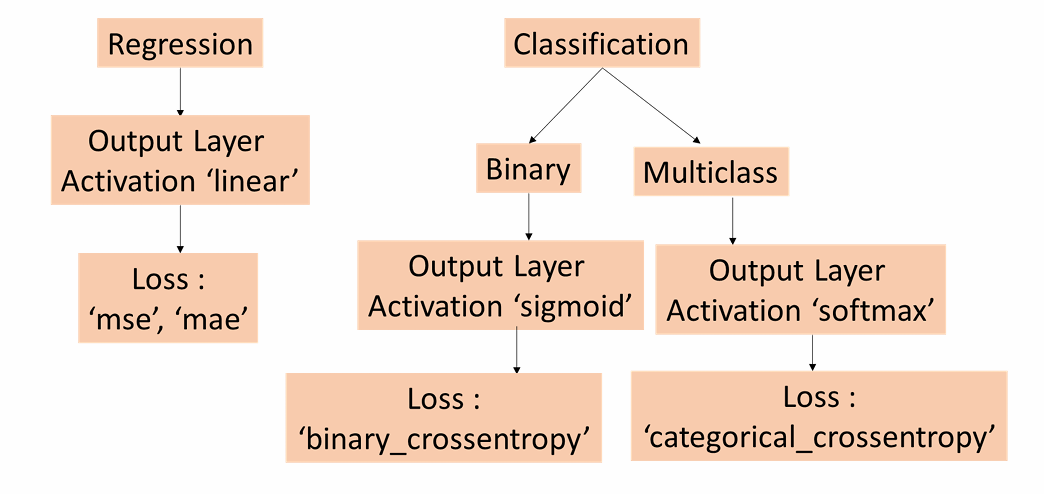

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
model = Sequential(
    layers = [
        Input(shape = (xtrain.shape[1],)),
        Dense(128, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(64, activation="relu", kernel_regularizer=l2(0.01)),
        Dropout(0.1),
        Dense(1, activation="sigmoid")
    ]
)

In [42]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [44]:
es = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

In [45]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=200, callbacks=[es])

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5437 - loss: 3.0607 - val_accuracy: 0.5375 - val_loss: 2.3465
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5761 - loss: 2.1602 - val_accuracy: 0.4812 - val_loss: 1.6916
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5578 - loss: 1.5728 - val_accuracy: 0.4812 - val_loss: 1.2849
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5515 - loss: 1.2087 - val_accuracy: 0.4938 - val_loss: 1.0393
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5829 - loss: 0.9857 - val_accuracy: 0.5437 - val_loss: 0.8945
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6779 - loss: 0.8531 - val_accuracy: 0.6687 - val_loss: 0.8065
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7868 - loss: 0.7715 - val_accuracy: 0.7000 - val_loss: 0.7548
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7849 - loss: 0.7115 - val_accuracy: 0.7500 - 

# Plot the learning curve

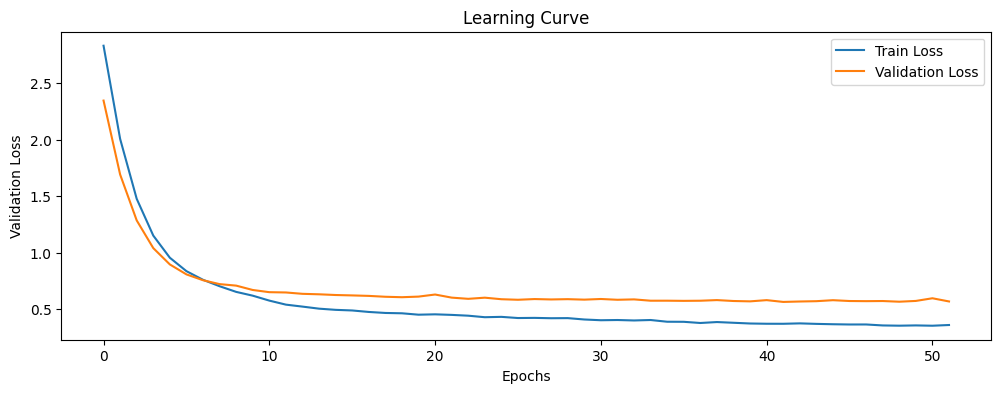

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Learning Curve")
plt.show()

# Model evaluation

In [47]:
yprob_test = model.predict(xtest)
yprob_test[0:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[0.54671365],
       [0.96661085],
       [0.97085834],
       [0.9674992 ],
       [0.467412  ]], dtype=float32)

In [48]:
ypred_test = [1 if prob >= 0.5 else 0 for prob in yprob_test]
ypred_test[0:5]

[1, 1, 1, 1, 0]

In [49]:
ytest.head()

,Liked
521,1
737,1
740,1
660,1
411,1


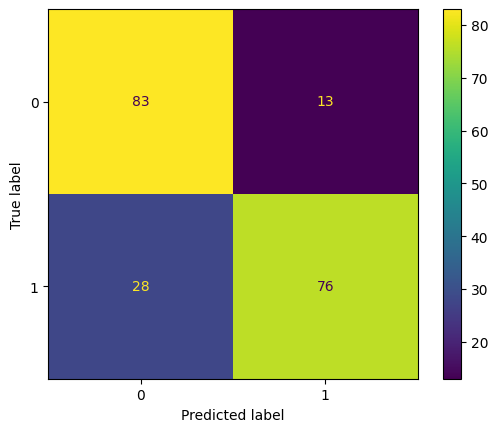

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [51]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        96
           1       0.85      0.73      0.79       104

    accuracy                           0.80       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.80      0.79       200



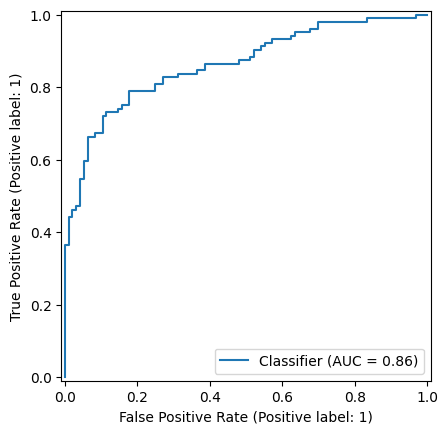

In [52]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(ytest, yprob_test)

# Predictions on out of sample data

In [61]:
def predict_sentiment(text: str) -> tuple:
  pre1 = clean_text(text)
  print(f"Clean text : {pre1}")
  pre2 = tfidf.transform([pre1]).toarray()
  pre3 = svd.transform(pre2)
  prob = model.predict(pre3)
  pred = 1 if prob >= 0.5 else 0
  return pred, prob

In [65]:
text = "Amazing! Restuarunt Really liked the taste ... "
pred1, prob1 = predict_sentiment(text)
print(f"Prediction : {pred1}")
print(f"Probability : {prob1}")

Clean text : amazing restuarunt really liked the taste
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction : 1
Probability : [[0.829943]]


In [66]:
text = "Really Bad service and it was too slow! ..."
pred2, prob2 = predict_sentiment(text)
print(f"Prediction : {pred2}")
print(f"Probability : {prob2}")

Clean text : really bad service and it was too slow
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediction : 0
Probability : [[0.0137953]]


In [67]:
text = "I really liked the book and the story was amazing ..."
pred3, prob3 = predict_sentiment(text)
print(f"Prediction : {pred3}")
print(f"Probability : {prob3}")

Clean text : i really liked the book and the story was amazing
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Prediction : 1
Probability : [[0.95552117]]


In [68]:
text = "I did not like this book, it was really bad!..."
pred4, prob4 = predict_sentiment(text)
print(f"Prediction : {pred4}")
print(f"Probability : {prob4}")

Clean text : i did not like this book it was really bad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Prediction : 0
Probability : [[0.01154233]]


In [69]:
text = "The ambience was good, but taste was bad!"
pred5, prob5 = predict_sentiment(text)
print(f"Prediction : {pred5}")
print(f"Probability : {prob5}")

Clean text : the ambience was good but taste was bad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction : 0
Probability : [[0.25290152]]
